In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image

In [2]:
import os

In [3]:
os.chdir(r'C:\Users\gaura\OneDrive\Desktop\traffic')

In [4]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Store Data Labels in the List

In [5]:
data = []
labels = []
classes = 43

In [6]:
cur_path = os.getcwd()

In [7]:
cur_path

'C:\\Users\\gaura\\OneDrive\\Desktop\\traffic'

# Preprocess the Image

In [8]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path +'\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

# Convert List into NumPy Arrays

In [9]:
data = np.array(data)
labels =np.array(labels)

# Save Labels and data for Future Use

In [10]:
#os.mkdir('training')

np.save('./training/data',data)
np.save('./training/target',labels)

# Load Data and Labels

In [11]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [12]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


# Convert labels to One Hot Encoding

In [15]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# Build the Model

In [16]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compile the Model

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 96s 95ms/step - loss: 3.0906 - accuracy: 0.3032 - val_loss: 0.5816 - val_accuracy: 0.8425
Epoch 2/20
981/981 [==============================] - 91s 93ms/step - loss: 0.7556 - accuracy: 0.7820 - val_loss: 0.1836 - val_accuracy: 0.9490
Epoch 3/20
981/981 [==============================] - 91s 93ms/step - loss: 0.3962 - accuracy: 0.8829 - val_loss: 0.1199 - val_accuracy: 0.9649
Epoch 4/20
981/981 [==============================] - 89s 91ms/step - loss: 0.2829 - accuracy: 0.9195 - val_loss: 0.1193 - val_accuracy: 0.9739
Epoch 5/20
981/981 [==============================] - 87s 89ms/step - loss: 0.2698 - accuracy: 0.9220 - val_loss: 0.0778 - val_accuracy: 0.9793
Epoch 6/20
981/981 [==============================] - 88s 89ms/step - loss: 0.2191 - accuracy: 0.9403 - val_loss: 0.0973 - val_accuracy: 0.9740
Epoch 7/20
981/981 [==============================] - 89s 90ms/step - loss: 0.2234 - accuracy: 0.9393 - val_loss: 0.0545 - val_accuracy:

In [19]:
model.save("my_model.h5")

# Accuracy Plot

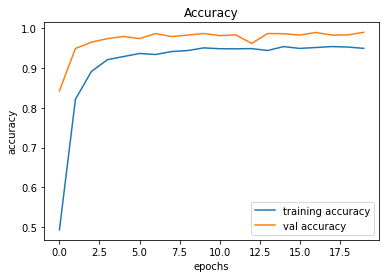

In [20]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Loss Plot

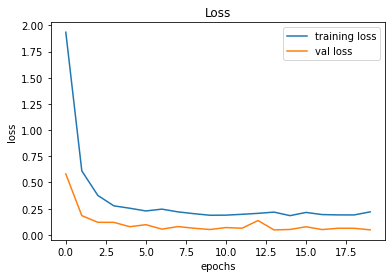

In [21]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing on Test Data

In [22]:
from sklearn.metrics import accuracy_score
def testing(testcsv):
    y_test = pd.read_csv('Test.csv')
    labels = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)

In [23]:
X_test=np.array(data)

In [24]:
Y_pred = model.predict_classes(X_test)
Y_pred

C:\Users\gaura\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([ 2,  0,  0, ..., 42, 42, 42], dtype=int64)

# Accuracy with Test Data

In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, Y_pred))

0.9931648346043


# Save Model

In [26]:
model.save('./training/TSR.h5')

# Make Graphic User Interface

In [27]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy

# Load the trained model to Classify Sign

In [28]:
from keras.models import load_model
model = load_model('./training/TSR.h5')

# Dictionary to label all traffic signs class

In [29]:
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

# Initialize Graphic User Interface (GUI)

In [30]:
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

In [31]:
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 

In [32]:
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

In [ ]:
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

Speed limit (30km/h)
Double curve
